In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('gld_price_data.csv')
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


### Data Understanding

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [5]:
df.shape

(2290, 6)

In [6]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


### Data Preprocessing

#### Data Cleaning

In [10]:
df.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [18]:
df.drop('Date',axis=1,inplace=True)

#### EDA

In [19]:
correlation=df.corr()

<Axes: >

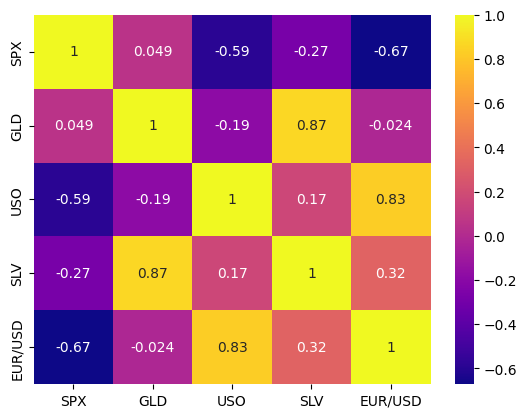

In [22]:
#heatmap
sns.heatmap(correlation,annot=True,cmap='plasma')

GLD(target variable) has positive relation with SPX SLV

In [23]:
#correlation with only target variable
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

C:\Users\rsyed\AppData\Local\Temp\ipykernel_3188\731472229.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'])


<Axes: xlabel='GLD', ylabel='Density'>

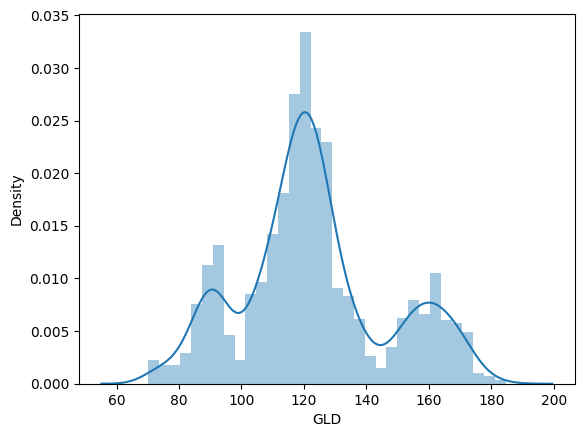

In [24]:
#Distribution of Gold price
sns.distplot(df['GLD'])

most of the values lies between 100 and 140

In [26]:
#splitting features and target  variables
X=df.drop(['GLD'],axis=1)
y=df['GLD']

In [29]:
#Train-Test-Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modelling

In [31]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)


RandomForestRegressor()

In [32]:
#prediction
ypred_train=rf.predict(X_train)
ypred_test=rf.predict(X_test)

In [35]:
#Evaluation
from sklearn.metrics import r2_score, mean_squared_error
print('TRAIN MSE: ',mean_squared_error(y_train,ypred_train))
print('TEST MSE: ',mean_squared_error(y_test,ypred_test))

print('TRAIN ACCURACY: ',r2_score(y_train,ypred_train))
print('TEST ACCURACY: ',r2_score(y_test,ypred_test))

TRAIN MSE:  0.7797045548310411
TEST MSE:  5.475899652578077
TRAIN ACCURACY:  0.9985564509657012
TEST ACCURACY:  0.9900129478486779


### Model deployment

In [36]:
import pickle
pickle.dump(rf,open('goldprice.pkl','wb'))